In [ ]:
#Business case of this portfolio is to predict whether the customer is going be a buyer or not.
#To work on this data, I'm following below steps:
#Data Collection.
#perfoeming EDA including both the predictors in data set.
#performing EDA by only one prediictor at a time.
#Building Visuals to understand the trends of the store.
#data preparation==> avoiding noice variables , dealing missing values and outliers.
#Statistical analysis.
#creating and comparing models and picking up the better model.
#Testing the model with various methods and finalyzing it.

# **Case-2: Building Classification Model to Predict the Buyer status**

In [ ]:
#reading the dataset location into url variable.
url="https://raw.githubusercontent.com/lokidiffender/Trivalley-Bike-Store-Analysis-Prediction-Model/main/Trivalley%20Customer%20Spend%20and%20Buyer%20Flag%20Data.csv"
url

'https://raw.githubusercontent.com/lokidiffender/Trivalley-Bike-Store-Analysis-Prediction-Model/main/Trivalley%20Customer%20Spend%20and%20Buyer%20Flag%20Data.csv'

In [ ]:
#importing pandas
import pandas as pd

#reading dataset into data variable
data=pd.read_csv(url)

In [ ]:
#displaying the data
data

,CustomerID,AveMonthSpend,BikeBuyer,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,89,0,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,...,4/8/1966,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,117,1,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,...,5/14/1965,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,123,0,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,...,8/12/1965,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,50,0,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,...,2/15/1968,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,95,1,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,...,8/8/1968,Bachelors,Professional,F,S,1,4,5,5,92771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16514,13121,101,0,NaN,Latasha,E,Jimenez,NaN,7259 Birchwood,NaN,...,3/22/1965,Bachelors,Professional,F,M,1,4,5,5,101542
16515,26100,46,0,NaN,James,Garner,Ptaszynski,NaN,7345 Kenwal Rd.,NaN,...,4/2/1936,Partial College,Professional,F,S,1,2,0,3,46549
16516,11328,79,0,NaN,Julian,M,Griffin,NaN,7398 Withersed Lane,NaN,...,1/1/1940,Bachelors,Management,M,M,1,2,0,5,133053
16517,23077,65,0,NaN,Marvin,A,Hernandez,NaN,1019 Book Road,NaN,...,10/20/1946,High School,Skilled Manual,M,M,1,2,0,4,31930


In [ ]:
#checking size of data.
data.shape

(16519, 25)

In [ ]:
#looking data and its features.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            16519 non-null  int64 
 1   AveMonthSpend         16519 non-null  int64 
 2   BikeBuyer             16519 non-null  int64 
 3   Title                 88 non-null     object
 4   FirstName             16519 non-null  object
 5   MiddleName            9534 non-null   object
 6   LastName              16519 non-null  object
 7   Suffix                2 non-null      object
 8   AddressLine1          16519 non-null  object
 9   AddressLine2          276 non-null    object
 10  City                  16519 non-null  object
 11  StateProvinceName     16519 non-null  object
 12  CountryRegionName     16519 non-null  object
 13  PostalCode            16519 non-null  object
 14  PhoneNumber           16519 non-null  object
 15  BirthDate             16519 non-null

In [ ]:
# Displaying descriptive stats of the dataset
data.describe()

,CustomerID,AveMonthSpend,BikeBuyer,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000
mean,20234.225195,72.405957,0.332284,0.673891,1.500999,0.992009,2.006235,78122.511532
std,5342.515987,27.285370,0.471046,0.468802,1.138962,1.515048,1.682736,39710.985718
min,11000.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15604.500000,52.000000,0.000000,0.000000,1.000000,0.000000,0.000000,47807.500000
50%,20221.000000,68.000000,0.000000,1.000000,2.000000,0.000000,2.000000,76120.000000
75%,24860.500000,84.000000,1.000000,1.000000,2.000000,2.000000,3.000000,105194.500000
max,29482.000000,176.000000,1.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


In [ ]:
#Checking data columns
data.columns

Index(['CustomerID', 'AveMonthSpend', 'BikeBuyer', 'Title', 'FirstName',
       'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2',
       'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode',
       'PhoneNumber', 'BirthDate', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome'],
      dtype='object')

In [ ]:
#deriving the age using birthdate of the customer as birth date doesn't help in predicting .
 # Import necessary libraries
import pandas as pd
from datetime import datetime

# Convert BirthDate column to datetime format
data['BirthDate'] = pd.to_datetime(data['BirthDate'])

# Calculate age based on current time zone
data['Age'] = (datetime.now() - data['BirthDate']).astype('<m8[Y]')

# Print head of dataframe to check results
print(data.head())

   CustomerID  AveMonthSpend  BikeBuyer Title  FirstName MiddleName LastName  \
0       11000             89          0   NaN        Jon          V     Yang   
1       11001            117          1   NaN     Eugene          L    Huang   
2       11002            123          0   NaN      Ruben        NaN   Torres   
3       11003             50          0   NaN    Christy        NaN      Zhu   
4       11004             95          1   NaN  Elizabeth        NaN  Johnson   

  Suffix         AddressLine1 AddressLine2  ...  Education    Occupation  \
0    NaN      3761 N. 14th St          NaN  ...  Bachelors  Professional   
1    NaN           2243 W St.          NaN  ...  Bachelors  Professional   
2    NaN     5844 Linden Land          NaN  ...  Bachelors  Professional   
3    NaN     1825 Village Pl.          NaN  ...  Bachelors  Professional   
4    NaN  7553 Harness Circle          NaN  ...  Bachelors  Professional   

  Gender MaritalStatus HomeOwnerFlag NumberCarsOwned NumberChi

In [ ]:
data.columns

Index(['CustomerID', 'AveMonthSpend', 'BikeBuyer', 'Title', 'FirstName',
       'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2',
       'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode',
       'PhoneNumber', 'BirthDate', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'Age'],
      dtype='object')

In [ ]:
#Ignoring unwanted columns which are not impacting our predictors
#Before that I'm creating two datasets each with having only one predictor or target varible
data_buyer_ornot=data[['CustomerID','BikeBuyer', 'Title', 'FirstName',
       'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2',
       'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode',
       'PhoneNumber', 'BirthDate', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome','Age']]

In [ ]:
!pip install -U --pre pycaret

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            16519 non-null  int64         
 1   BikeBuyer             16519 non-null  int64         
 2   Title                 88 non-null     object        
 3   FirstName             16519 non-null  object        
 4   MiddleName            9534 non-null   object        
 5   LastName              16519 non-null  object        
 6   Suffix                2 non-null      object        
 7   AddressLine1          16519 non-null  object        
 8   AddressLine2          276 non-null    object        
 9   City                  16519 non-null  object        
 10  StateProvinceName     16519 non-null  object        
 11  CountryRegionName     16519 non-null  object        
 12  PostalCode            16519 non-null  object        
 13  PhoneNumber     

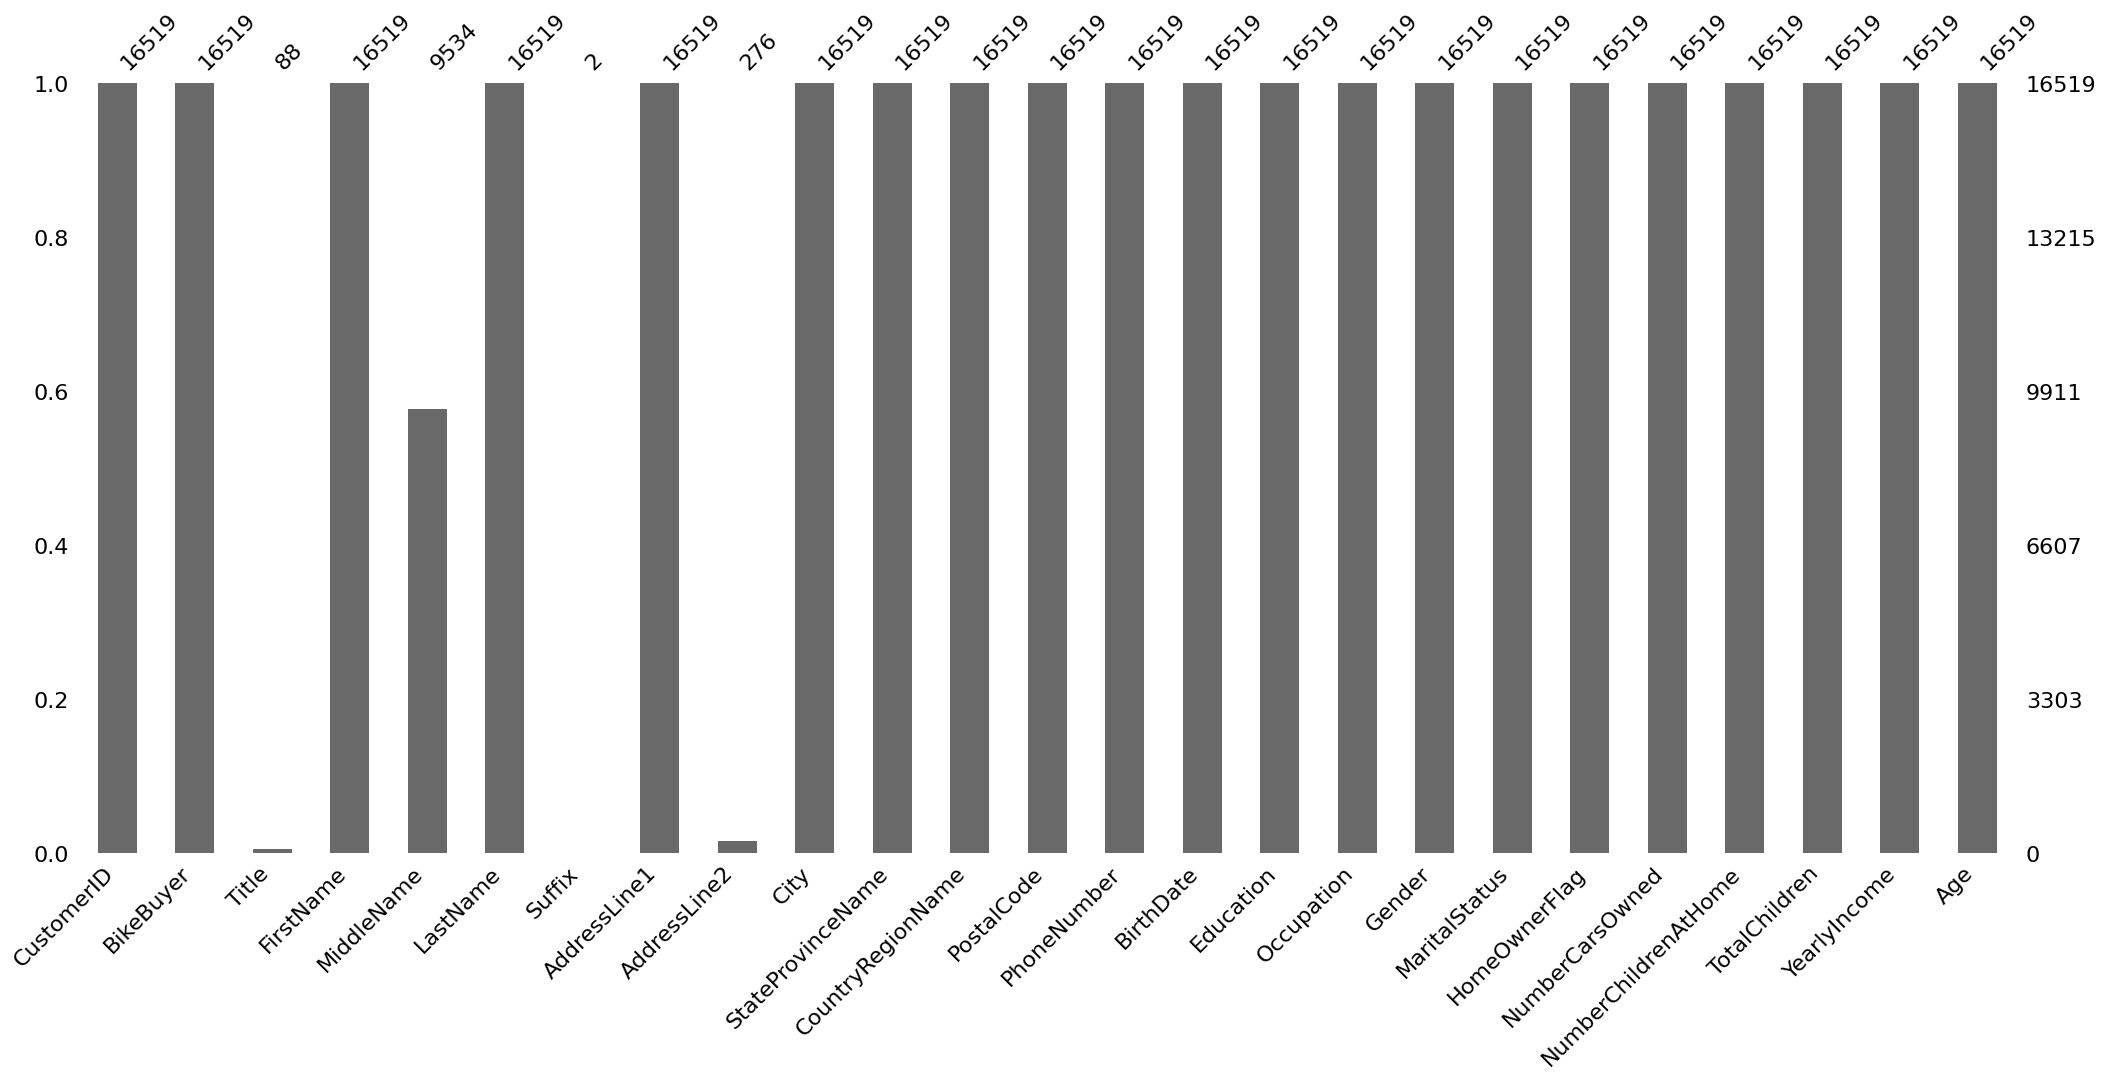

In [ ]:
import missingno as msno
msno.bar(data_buyer_ornot)
data_buyer_ornot.info()

In [ ]:
print(data_buyer_ornot.shape)
data_buyer_ornot.info()

(16519, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            16519 non-null  int64         
 1   BikeBuyer             16519 non-null  int64         
 2   Title                 88 non-null     object        
 3   FirstName             16519 non-null  object        
 4   MiddleName            9534 non-null   object        
 5   LastName              16519 non-null  object        
 6   Suffix                2 non-null      object        
 7   AddressLine1          16519 non-null  object        
 8   AddressLine2          276 non-null    object        
 9   City                  16519 non-null  object        
 10  StateProvinceName     16519 non-null  object        
 11  CountryRegionName     16519 non-null  object        
 12  PostalCode            16519 non-null  object        
 13  Phon

In [ ]:
# Importing pycaret classification libraries
from pycaret.classification import *

In [ ]:
#updating the lists for classification
y='BikeBuyer'
data_buyer_ornot=data[['CustomerID','BikeBuyer', 'Title', 'FirstName',
       'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2',
       'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode',
       'PhoneNumber', 'BirthDate', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome','Age']]
ignored_cols=['CustomerID','Title', 'FirstName', 'MiddleName',
       'LastName', 'Suffix', 'AddressLine1', 'AddressLine2','PostalCode', 'PhoneNumber',
       'BirthDate']
categorical_cols=['City',
       'StateProvinceName', 'CountryRegionName',
       'Education', 'Occupation', 'Gender', 'MaritalStatus']
numerical_cols=['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'Age']

In [ ]:
# Configuring the ML experiment using setup function
classif_model  = setup(data=data_buyer_ornot,
                       target = y,
                       ignore_features  = ignored_cols,
                       categorical_features = categorical_cols,
                       numeric_features= numerical_cols,
                       n_jobs=1)

,Description,Value
0,Session id,1317
1,Target,BikeBuyer
2,Target type,Binary
3,Original data shape,"(16519, 25)"
4,Transformed data shape,"(16519, 27)"
5,Transformed train set shape,"(11563, 27)"
6,Transformed test set shape,"(4956, 27)"
7,Ignore features,11
8,Ordinal features,2
9,Numeric features,6


In [ ]:
# Invoking the ML algorithms
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7952,0.8550,0.5848,0.7443,0.6549,0.5123,0.5199,2.1810
lightgbm,Light Gradient Boosting Machine,0.7925,0.8503,0.5914,0.7331,0.6545,0.5087,0.5148,0.5630
ada,Ada Boost Classifier,0.7898,0.8442,0.6114,0.7150,0.6590,0.5085,0.5118,0.8470
ridge,Ridge Classifier,0.7821,0.0000,0.5260,0.7435,0.6160,0.4700,0.4838,0.4410
lda,Linear Discriminant Analysis,0.7812,0.8264,0.5354,0.7346,0.6192,0.4710,0.4826,0.4010
rf,Random Forest Classifier,0.7793,0.8309,0.5804,0.7035,0.6360,0.4797,0.4844,1.8170
xgboost,Extreme Gradient Boosting,0.7786,0.8349,0.5903,0.6972,0.6392,0.4811,0.4847,0.5470
nb,Naive Bayes,0.7656,0.8052,0.4479,0.7455,0.5594,0.4130,0.4380,0.3320
qda,Quadratic Discriminant Analysis,0.7608,0.8078,0.6156,0.6474,0.6308,0.4541,0.4546,0.4650
et,Extra Trees Classifier,0.7590,0.8115,0.5776,0.6562,0.6142,0.4400,0.4420,1.7780


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1317, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#Building the model using the best algo from compare.models() function
model_buyer_or_not=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7805,0.8425,0.5755,0.7083,0.6351,0.4805,0.4858
1,0.7952,0.8597,0.5922,0.7403,0.6580,0.5144,0.5209
2,0.8099,0.8573,0.6000,0.7778,0.6774,0.5458,0.5550
3,0.8019,0.8573,0.5938,0.7575,0.6657,0.5279,0.5358
4,0.7794,0.8280,0.5651,0.7115,0.6299,0.4757,0.4821
5,0.8045,0.8616,0.6068,0.7565,0.6734,0.5363,0.5429
6,0.7855,0.8514,0.5573,0.7329,0.6331,0.4855,0.4946
7,0.7967,0.8644,0.5990,0.7395,0.6619,0.5188,0.5247
8,0.7933,0.8589,0.5625,0.7526,0.6438,0.5024,0.5130


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Using the algo to predict values(Buyer Or Not)
predicted_avg_spendings=predict_model(model_buyer_or_not,data_buyer_ornot)
predicted_avg_spendings.to_csv("Trivalley_Regular_BuyerOrNot_predicted_results.csv")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8128,0.8757,0.6129,0.7765,0.6851,0.5545,0.5623


In [ ]:
import pandas as pd
from pycaret.classification import *

In [ ]:
#importing testing data from client file to predict the values.
url1="https://raw.githubusercontent.com/nvamsimohan/DallasDSA/main/Trivalley%20Client%20data%20file.csv"
client_data=pd.read_csv(url1)

In [ ]:
print(client_data.columns)
# categorical_cols=['City',
#        'StateProvinceName', 'CountryRegionName',
#        'Education', 'Occupation', 'Gender', 'MaritalStatus']
# numerical_cols=['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
#        'TotalChildren', 'YearlyIncome', 'Age']

Index(['CustomerID', 'City', 'StateProvinceName', 'CountryRegionName',
       'PostalCode', 'BirthDate', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome'],
      dtype='object')


In [ ]:
# Convert BirthDate column to datetime format
client_data['BirthDate'] = pd.to_datetime(client_data['BirthDate'])

# Calculate age based on current time zone
client_data['Age'] = (datetime.now() - client_data['BirthDate']).astype('<m8[Y]')

# Print head of dataframe to check results
print(client_data.head())

   CustomerID           City StateProvinceName CountryRegionName PostalCode  \
0       58772        Seaford          Victoria         Australia       3198   
1       98594     North Ryde   New South Wales         Australia       2113   
2       96960     Wollongong   New South Wales         Australia       2500   
3       72891  East Brisbane        Queensland         Australia       4169   
4       74195    Warrnambool          Victoria         Australia       3280   

   BirthDate   Education    Occupation Gender MaritalStatus  HomeOwnerFlag  \
0 1965-05-14  Bachelors   Professional      M             S              0   
1 1968-02-15  Bachelors   Professional      F             S              0   
2 1968-08-08  Bachelors   Professional      F             S              1   
3 1965-08-05  Bachelors   Professional      M             S              1   
4 1964-05-09  Bachelors   Professional      M             M              1   

   NumberCarsOwned  NumberChildrenAtHome  TotalChildren 

In [ ]:
client_predictions = predict_model(model_buyer_or_not, client_data)
client_predictions.to_csv("Trivalley_Client_BuyerOrNot_predicted_results.csv")